# Loan Approval Prediction Analysis
Author :-

Jayant Patel 24/11/EC/047

Gopal Chaurasiya 24/11/EC/046

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jayantpatel06/Loan_Prediction_Analysis/refs/heads/main/Loan%20Prediction%20Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the dataset

In [4]:
# find the null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [6]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## Exploratory Data Analysis

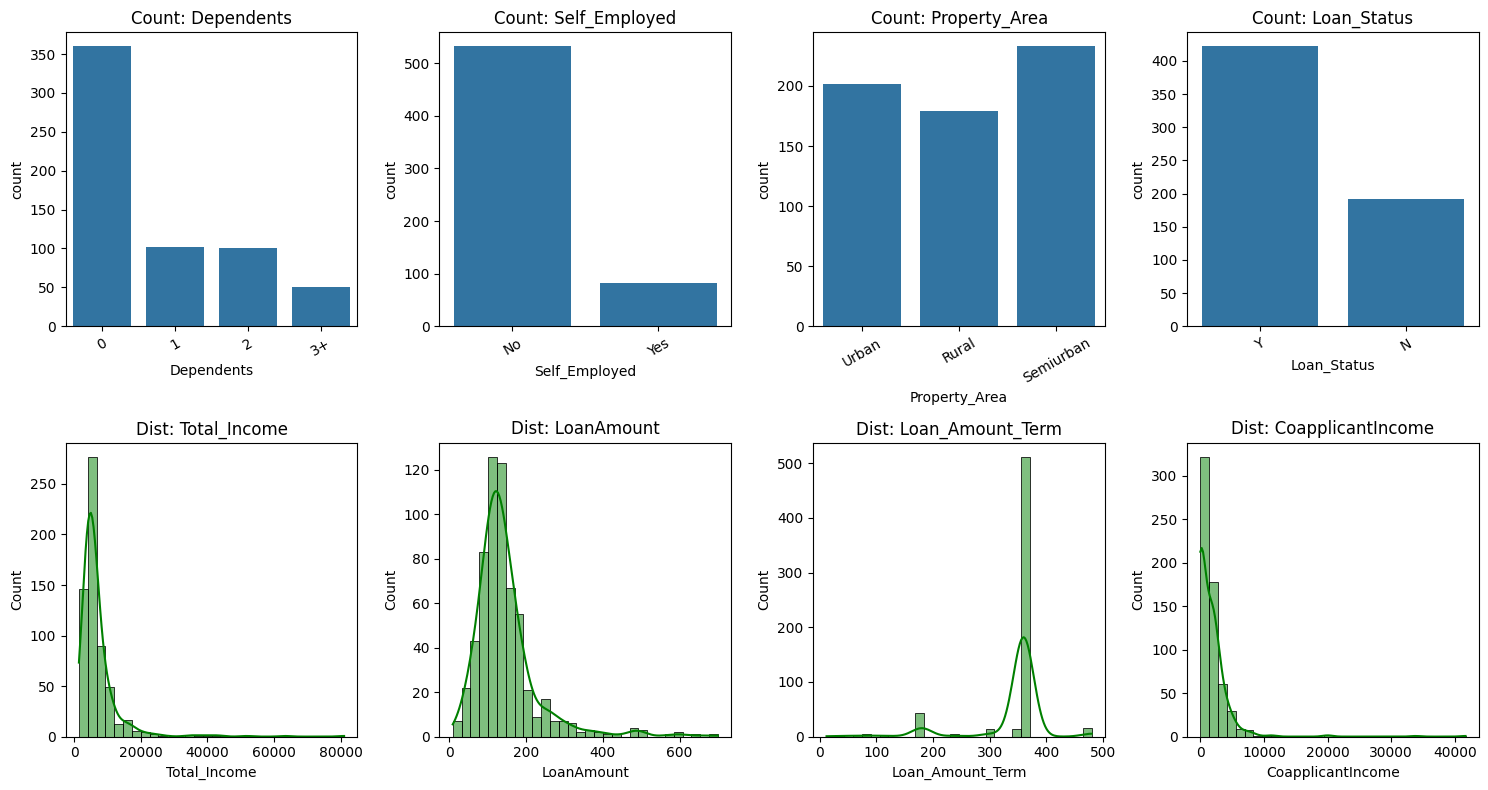

In [8]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
categorical_cols = ['Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
numerical_cols = ['Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncome']

# Set up the plot
total_plots = len(categorical_cols) + len(numerical_cols)
cols = 4
rows = (total_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# Plot categorical columns (as countplots)
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Count: {col}")
    axes[i].tick_params(axis='x', rotation=30)

# Plot numerical columns (as histograms)
for i, col in enumerate(numerical_cols, start=len(categorical_cols)):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='green')
    axes[i].set_title(f"Dist: {col}")

# Hide unused subplots
for j in range(total_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Log Transformation

In [9]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
df['LoanAmountLog'] = np.log(df['LoanAmount']+1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
df['Total_Income_Log'] = np.log(df['Total_Income']+1)

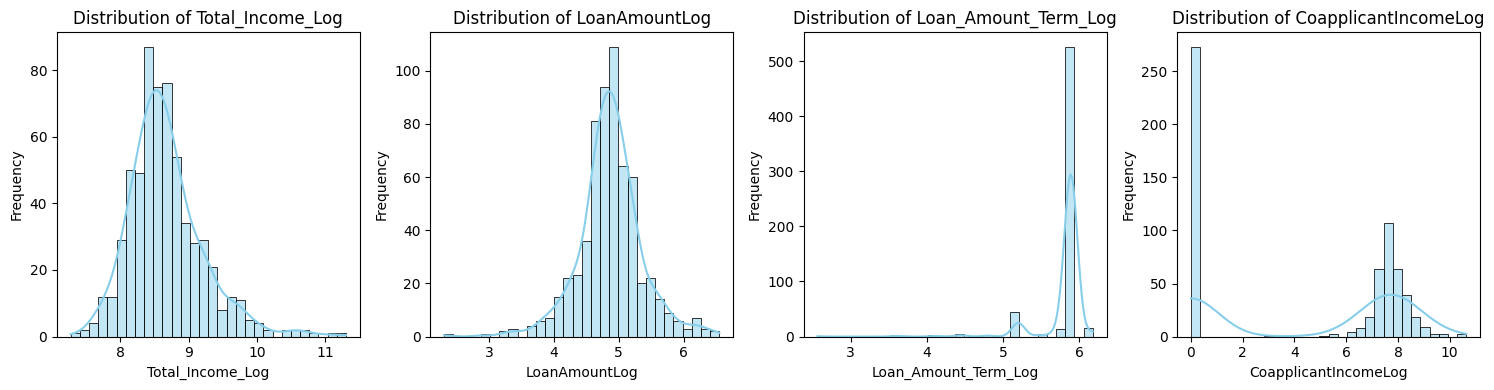

In [10]:
numerical_cols_log = ['Total_Income_Log', 'LoanAmountLog', 'Loan_Amount_Term_Log', 'CoapplicantIncomeLog']
fig, axes = plt.subplots(1, len(numerical_cols_log), figsize=(15, 4))
# Plot histograms for each log-transformed column
for i, col in enumerate(numerical_cols_log):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   LoanAmountLog         614 non-null    float64
 9   Loan_Amount_Term_Log  614 non-null    float64
 10  Total_Income_Log      614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


## Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

## Coorelation Matrix

<Axes: >

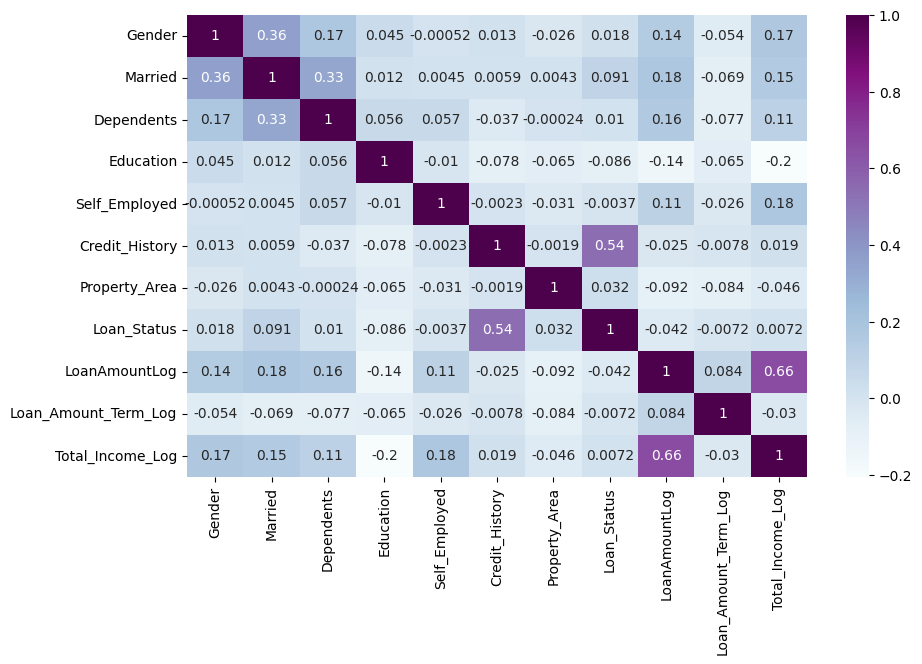

In [13]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap="BuPu")

## Model Training

Model Comparison Results:
Logistic Regression -> Accuracy: 77.27%, MSE: 0.2273, AUC: 0.7076, Cross-Validation Accuracy: 82.17%
Decision Tree -> Accuracy: 70.13%, MSE: 0.2987, AUC: 0.6678, Cross-Validation Accuracy: 72.39%
Random Forest -> Accuracy: 77.92%, MSE: 0.2208, AUC: 0.7542, Cross-Validation Accuracy: 79.78%


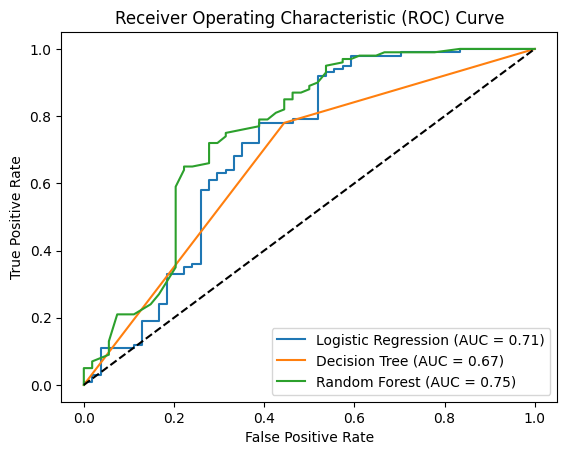

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, roc_curve, auc

# Assuming df is your DataFrame with the features X and target y
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Function to calculate AUC, MSE, Accuracy, and Cross-Validation Score
def compare_models(models, x_train, y_train, x_test, y_test):
    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Predictions
        y_pred = model.predict(x_test)
        y_pred_proba = model.predict_proba(x_test)[:, 1]  # For AUC

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        # Cross-validation score
        cv_score = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
        cv_mean = np.mean(cv_score)

        # Store results
        results[name] = {
            "Accuracy": accuracy,
            "MSE": mse,
            "AUC": auc_score,
            "Cross-Validation Accuracy": cv_mean
        }

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Display Results
    print("Model Comparison Results:")
    for name, result in results.items():
        print(f"{name} -> Accuracy: {result['Accuracy']*100:.2f}%, MSE: {result['MSE']:.4f}, AUC: {result['AUC']:.4f}, Cross-Validation Accuracy: {result['Cross-Validation Accuracy']*100:.2f}%")

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to compare models
compare_models(models, x_train, y_train, x_test, y_test)


## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

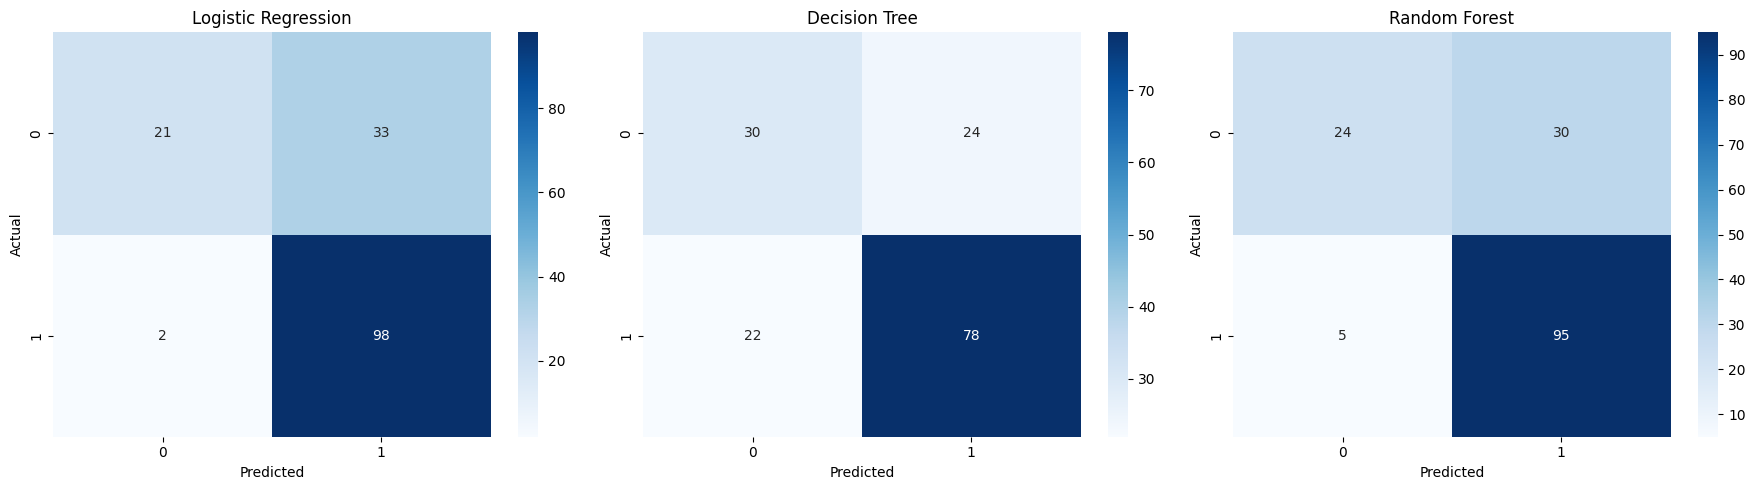

In [15]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrices
conf_matrices = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

# Plot all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()